In [1]:
function walk(num_steps)
    
    x = 0
    
    for i in 1:num_steps
        x += rand( (-1, +1) )
    end
    
    return x
end

walk (generic function with 1 method)

In [2]:
num_steps = 20
walk(num_steps)

0

In [3]:
experiment(num_steps, num_walks) = [walk(num_steps) for i in 1:num_walks]

experiment (generic function with 1 method)

In [17]:
data = experiment(20, 1000)

data'   # transpose(data) --  ' = transpose

1×1000 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 2  -2  -10  -4  12  2  0  2  2  -2  4  …  4  -4  6  2  -2  2  4  0  0  2  -4

In [18]:
using StatsBase

In [20]:
counts = countmap(data);

In [4]:
using Plots

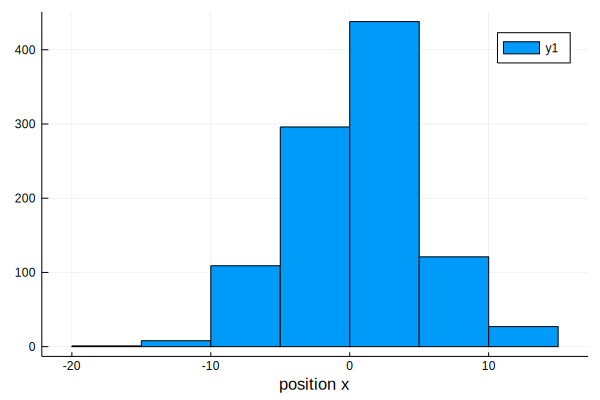

In [29]:
histogram(data, bins=10)  # in Plots.jl package
xlabel!("position x")

In [30]:
using StatsBase

In [31]:
h = fit(Histogram, data)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -20.0:5.0:15.0
weights: [1, 8, 109, 296, 438, 121, 27]
closed: left
isdensity: false

In [33]:
h.weights / sum(h.weights)

7-element Array{Float64,1}:
 0.001
 0.008
 0.109
 0.296
 0.438
 0.121
 0.027

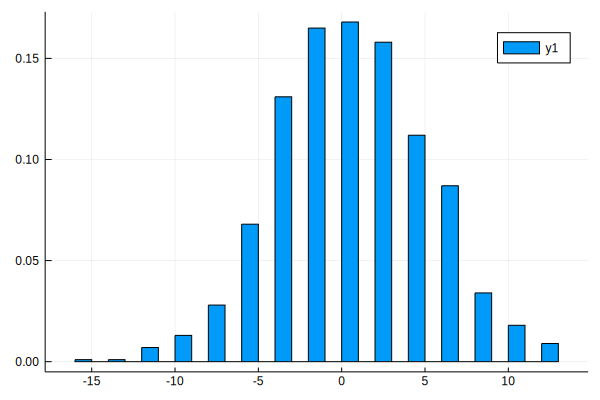

In [35]:
histogram(data, bins=30, normed=true)  # in Plots.jl package


In [36]:
data

1000-element Array{Int64,1}:
   2
  -2
 -10
  -4
  12
   2
   0
   2
   2
  -2
   4
   0
  -6
   ⋮
   2
   4
  -4
   6
   2
  -2
   2
   4
   0
   0
   2
  -4

In [37]:
mean(data)

0.116

In [38]:
sum(data) / length(data)

0.116

## Spread away from mean

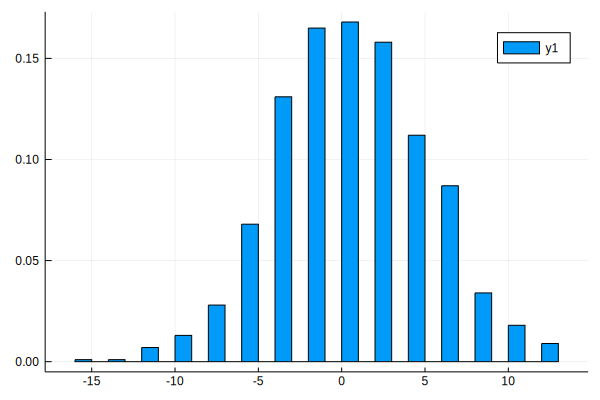

In [40]:
histogram(data, normed=true, bins=30)

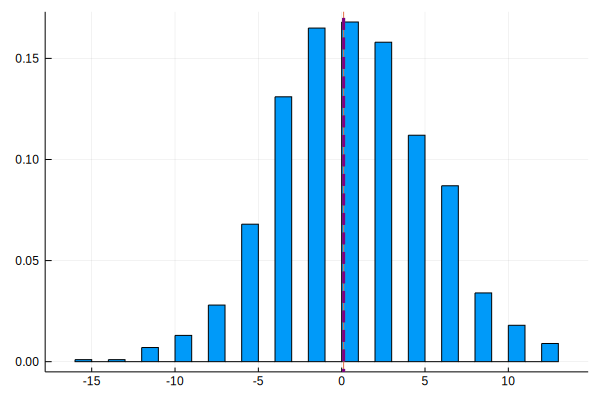

In [43]:
vline!([mean(data)], lw=3, ls=:dash, leg=false, c=:purple)

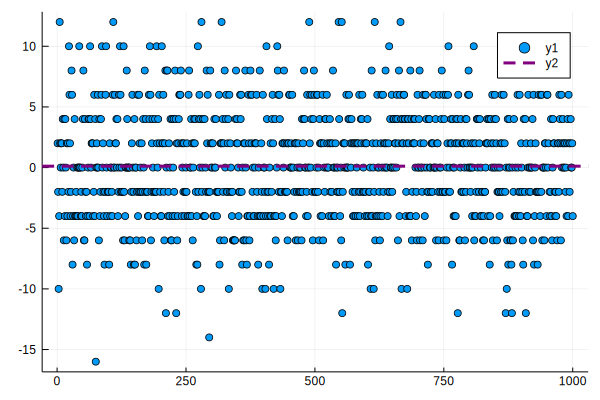

In [46]:
scatter(data)

hline!([mean(data)], lw=3, ls=:dash, c=:purple)




In [49]:
m = mean(data)   # de-mean:  subtract:
centred_data = data .- m;    

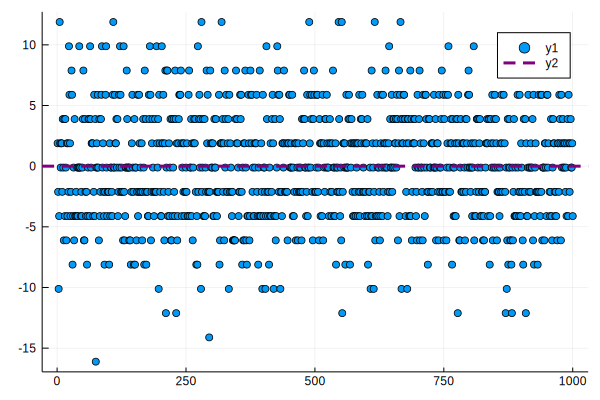

In [50]:
scatter(centred_data)

hline!([mean(centred_data)], lw=3, ls=:dash, c=:purple)



In [51]:
mean(centred_data)  

2.9665159217984184e-16

`1e-16` is notation for $10^{-16}$

In [52]:
nextfloat(1.0)

1.0000000000000002

In [53]:
nextfloat(1.0) - 1.0   # machine epsilon for double precision -- Float64 

2.220446049250313e-16

In [54]:
abs_data = abs.(centred_data)

1000-element Array{Float64,1}:
  1.884
  2.116
 10.116
  4.116
 11.884
  1.884
  0.116
  1.884
  1.884
  2.116
  3.884
  0.116
  6.116
  ⋮
  1.884
  3.884
  4.116
  5.884
  1.884
  2.116
  1.884
  3.884
  0.116
  0.116
  1.884
  4.116

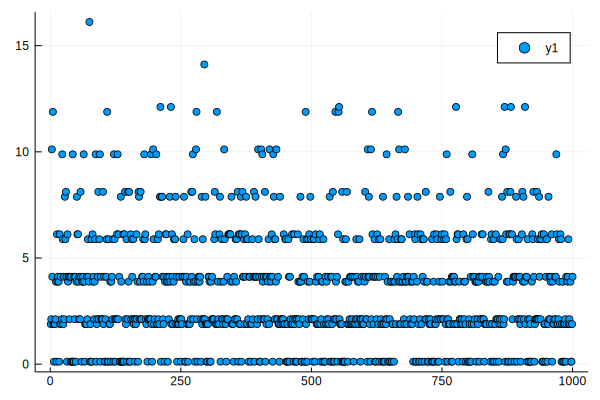

In [55]:
scatter(abs_data)

In [56]:
mean(abs_data)

3.595024

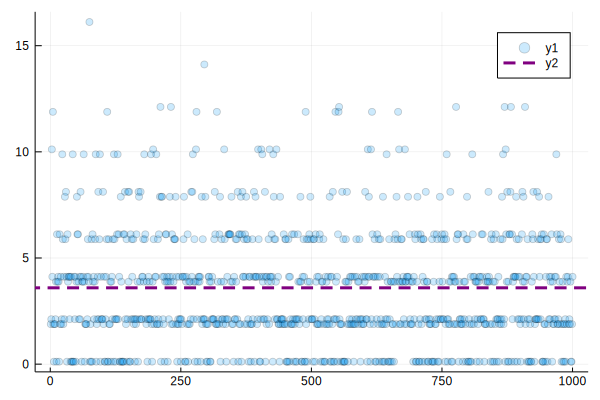

In [61]:
scatter(abs_data, alpha=0.2)

hline!([mean(abs_data)], lw=3, ls=:dash, c=:purple)

In [64]:
m = mean(abs_data)

count(abs_data .< m) / length(abs_data)

0.491

In [65]:
count(abs_data .< 2m) / length(abs_data)    # 2m instead of 2*m

0.889

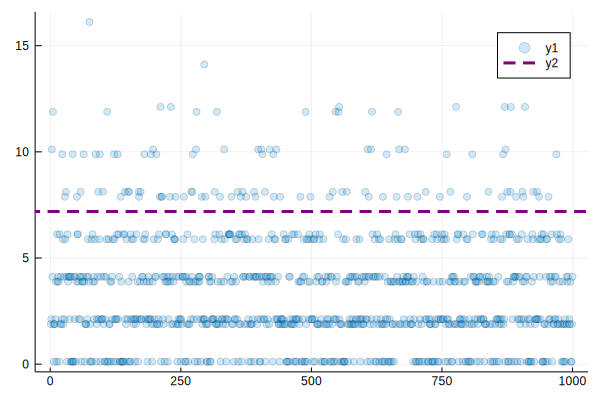

In [66]:
scatter(abs_data, alpha=0.2)

hline!([2*mean(abs_data)], lw=3, ls=:dash, c=:purple)

In [68]:
squared_data = data.^2;

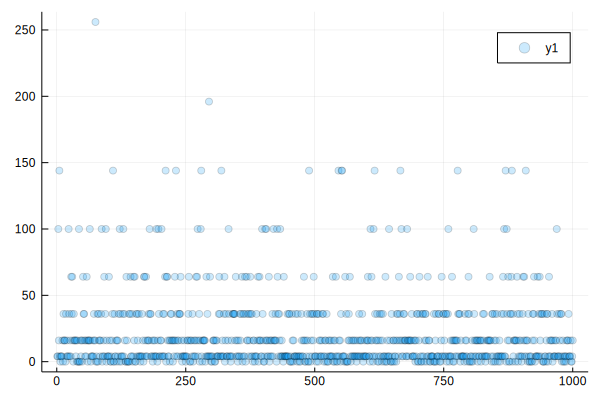

In [71]:
scatter(squared_data, alpha=0.2)

In [5]:
@time data = experiment(50, 10^6);

  0.356394 seconds (2 allocations: 7.629 MiB)


In [9]:
using StatsBase

In [10]:
m = mean(data)

variance = mean((data .- m).^2)

σ = √(variance)  # \sigma<TAB>   # \sqrt<TAB>  # standard deviation

7.066092713168997

In [11]:
[(m - σ) < x < (m + σ) for x in data];

In [12]:
count((m - σ) .< data .< (m + σ)) / length(data)

0.677962

In [19]:
data2 = data[1:5_000];


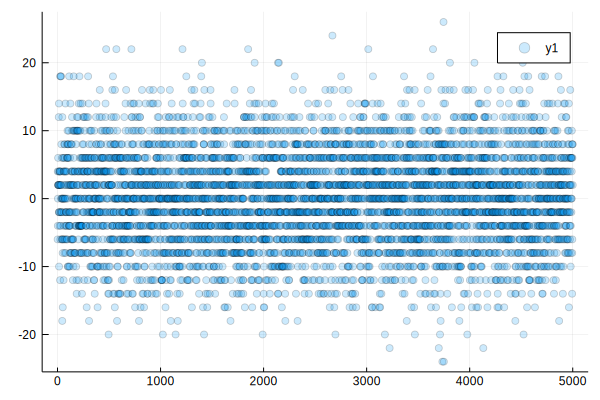

In [20]:
scatter(data2, alpha=0.2)

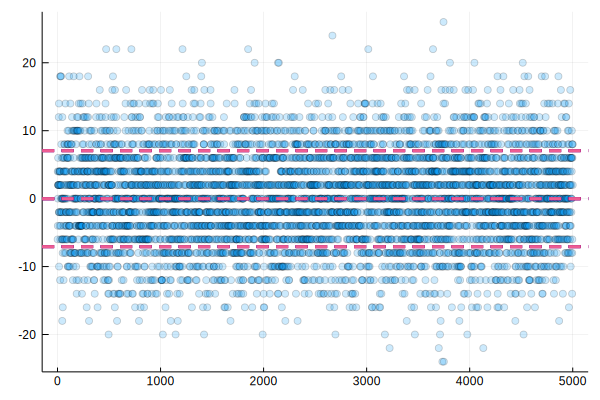

In [28]:
hline!([m, m+σ, m-σ], lw=3, ls=:dash, leg=false)

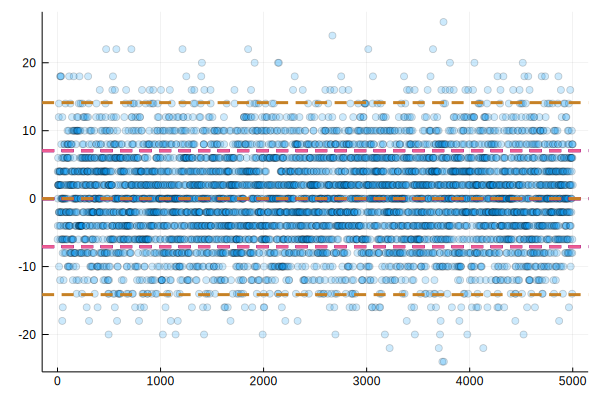

In [29]:
hline!([m, m+2σ, m-2σ], lw=3, ls=:dash, leg=false)

In [30]:
count((m - 2σ) .< data .< (m + 2σ)) / length(data)

0.967248

## Standard error of the mean

$N$ data points sampled from the same distribution, calculate the mean

In [35]:
num_steps = 20
N = 100

data = experiment(num_steps, N)

m = mean(data)

-0.22

In [47]:
num_steps = 20
N = 1000

data = experiment(num_steps, N)

m = mean(data)

0.164

In [48]:
using Statistics

In [43]:
σ = std(data)

4.190116116896174

$X_1 + X_2 + \cdots + X_N$

In [49]:
standard_error_of_mean = σ / √N

0.1325031058997225

In [51]:
mean_data = [mean(experiment(num_steps, N)) for i in 1:1000];


In [54]:
std(mean_data)

0.14236756134219103

In [55]:
mean_data = [mean(experiment(num_steps, 4N)) for i in 1:1000];

In [56]:
std(mean_data)

0.07322830162689259

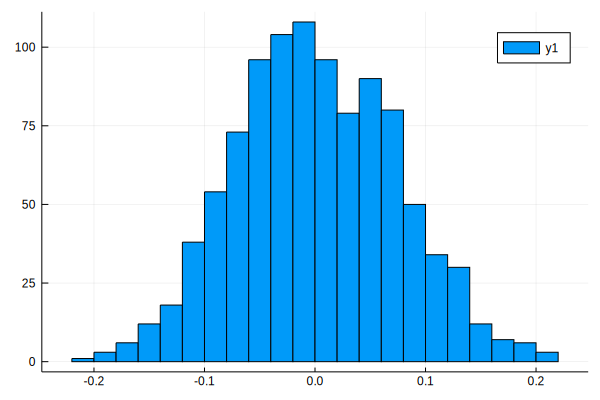

In [57]:
histogram(mean_data)

# Defining new types in Julia 

Random walker:

In [58]:
x = 0

x += 1

1

In [59]:
x2 = 0
x2 -= 1

-1

In [60]:
y = 0.0

y += randn()   # random number from a gaussian distribution

-0.41883079557282155

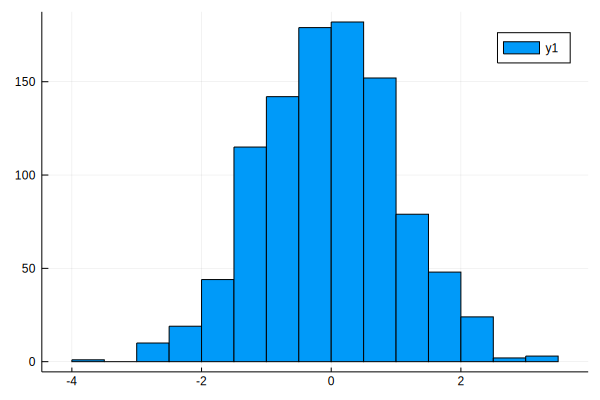

In [61]:
histogram(randn(1000))  # ziggurat algorithm for normally  distributed random numbers

# See also Distributions.jl 

How write **generic** code? A single `walk` function to generate random walk that works with discrete and continuous distributions

In [62]:
discrete_jump() = rand( (-1, +1 ))

continuous_jump() = randn()

continuous_jump (generic function with 1 method)

In [63]:
function walk(N)
    
    x = 0
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 1 method)

In [ ]:
# DON'T DO THIS!

function walk(N, walker_type)
    
    if walker_type == "discrete"
        ...
        
end


In [64]:
function walk(N, jump)
    
    x = 0  # integer
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 2 methods)

In [76]:
walk(20, discrete_jump)

-4

In [77]:
walk(20, continuous_jump)

6.0904266229323145

In [78]:
using BenchmarkTools

In [79]:
@btime walk(20, discrete_jump)

  125.640 ns (0 allocations: 0 bytes)


-4

In [81]:
@btime walk(20, continuous_jump)

  155.878 ns (0 allocations: 0 bytes)


1.0104291115561674

In [82]:
function walk(N, jump, x0)
    
    x = x0
    
    for i in 1:N
        x += jump()
    end
    
    return x
end

walk (generic function with 3 methods)

In [83]:
walk(20, continuous_jump, 0.0)

-4.3678555053328

## Custom types / user-defined types / composite types

Julia has **objects** (of user-defined types), but **not** object-oriented prog lang

In [84]:
struct MyDiscreteRandomWalker
    x::Int   # type annotation: x is of type Integer
end

"Box with data inside"

To make an object of this type:

In [85]:
MyDiscreteRandomWalker

MyDiscreteRandomWalker

In [87]:
w = MyDiscreteRandomWalker(10)

MyDiscreteRandomWalker(10)

In [88]:
w

MyDiscreteRandomWalker(10)

In [90]:
w.x  # the variable x that lives inside the **object** w

10

Move the walker:


In [91]:
w.x = w.x + 1

ErrorException: setfield! immutable struct of type MyDiscreteRandomWalker cannot be changed

In [92]:
mutable struct MyDiscreteRandomWalker2
    x::Int   # type annotation: x is of type Integer
end

In [93]:
w = MyDiscreteRandomWalker2(10)

MyDiscreteRandomWalker2(10)

In [94]:
w.x += 1

11

In [95]:
jump!(w::MyDiscreteRandomWalker2) = w.x += rand( (-1, +1) )

jump! (generic function with 1 method)

In [97]:
function jump!(w::MyDiscreteRandomWalker2)  # takes arg of type MyDiscreteRandomWalker2
    w.x += rand( (-1, +1) )
    return w
end

jump! (generic function with 1 method)

In [98]:
w

MyDiscreteRandomWalker2(11)

In [99]:
jump!(w)

MyDiscreteRandomWalker2(10)

In [100]:
w

MyDiscreteRandomWalker2(10)

In [102]:
function walk!(w::MyDiscreteRandomWalker2, N)
    for i in 1:N
        jump!(w)
    end
end

walk! (generic function with 1 method)

In [103]:
w

MyDiscreteRandomWalker2(10)

In [104]:
w = MyDiscreteRandomWalker2(0)

MyDiscreteRandomWalker2(0)

In [105]:
MyDiscreteRandomWalker2() = MyDiscreteRandomWalker2(0)

MyDiscreteRandomWalker2

In [106]:
methods(MyDiscreteRandomWalker2)

# 3 methods for type constructor:
[1] MyDiscreteRandomWalker2() in Main at In[105]:1
[2] MyDiscreteRandomWalker2(x::Int64) in Main at In[92]:2
[3] MyDiscreteRandomWalker2(x) in Main at In[92]:2

In [107]:
w = MyDiscreteRandomWalker2()

MyDiscreteRandomWalker2(0)

In [108]:
w2 = MyDiscreteRandomWalker2()

MyDiscreteRandomWalker2(0)

In [109]:
walk!(w, 1)

In [110]:
w

MyDiscreteRandomWalker2(-1)

In [111]:
w2

MyDiscreteRandomWalker2(0)

In [112]:
w.x

-1

In [113]:
w2.x

0